# Libraries

In [1]:
import os
# os.sys.path
import cv2
import numpy as np
import IPython
        
from matplotlib import pyplot as plt
# Plot inline
%matplotlib inline

import utils

## 2.1
Load the set of images and display them as Grayscale and rgb images. You are required to show these
images ”inline” rather than creating a new window for every other image. (2 points)

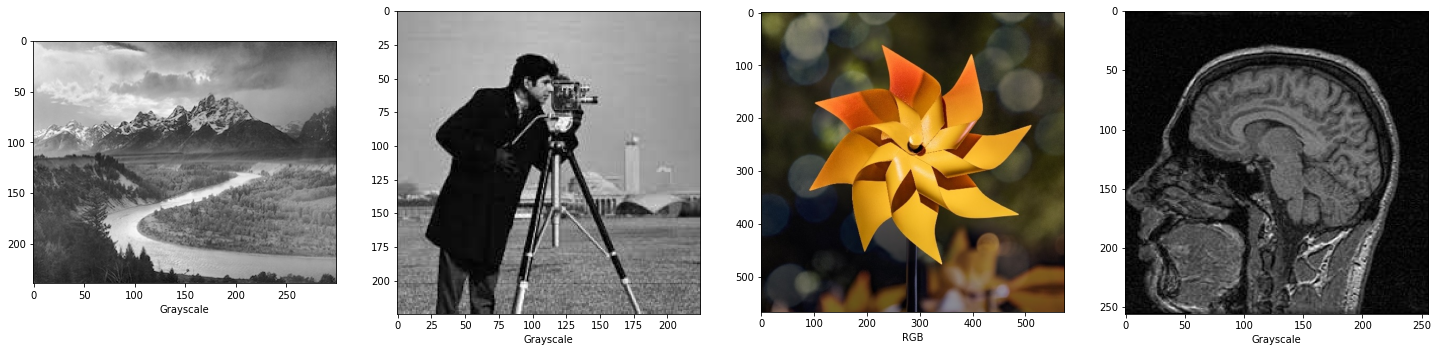

In [5]:
def isgray(img):
    if img.shape[2]  == 1 or len(img.shape) < 3: return True
    b,g,r = cv2.split(img)
    if (b==g).all() and (b==r).all(): return True
    return False
#files = os.listdir(os.path.join(now,"Fall2020_CS867_A1 (1)","images"))
#now = os.getcwd()
#print(now)
# for file in files:
#     print(os.path.join(now,"Fall2020_CS867_A1 (1)"))

IMAGES_PATHS = [os.path.join("images",path) for path in os.listdir("images")]

f, axarr = plt.subplots(1,4, figsize=(25,8))

for i, img_path in enumerate(IMAGES_PATHS[-4:]):
    img = cv2.imread(img_path)
    img_type = "Grayscale" if isgray(img) else "RGB"
    # reversing the channels (bgr -> rgb for display)
    img = img[:,:,::-1]
    
    axarr[i].imshow(img)
    axarr[i].set_xlabel(img_type)
plt.show()

## 2.2
Implement the function rgbExclusion() in the helper script, in which the input image is decomposed
into the three channels: R, G and B and return the image excluding the specified channel. Display
the results in notebook. (3 points)

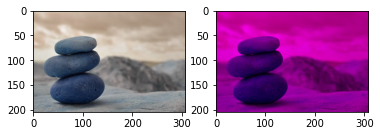

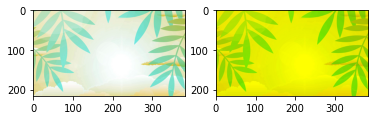

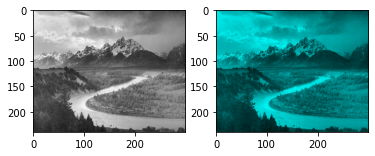

In [6]:
orig_img = cv2.imread(IMAGES_PATHS[1])
new_img = utils.rgbExclusion(orig_img, "g")

f, axarr = plt.subplots(1,2)
axarr[0].imshow(orig_img)
axarr[1].imshow(new_img)

orig_img = cv2.imread(IMAGES_PATHS[2])
new_img = utils.rgbExclusion(orig_img, "r")

f, axarr = plt.subplots(1,2)
axarr[0].imshow(orig_img)
axarr[1].imshow(new_img)

orig_img = cv2.imread(IMAGES_PATHS[5])
new_img = utils.rgbExclusion(orig_img, "b")

f, axarr = plt.subplots(1,2)
axarr[0].imshow(orig_img)
axarr[1].imshow(new_img)

## 2.3
Take at-least 3 images from given set and plot histograms before and after applying histogram equal-
ization. Show these image inline format i.e. grayscale image –> display histogram –> apply histogram
equalization–> display the equalized image and its histogram. (5 points)

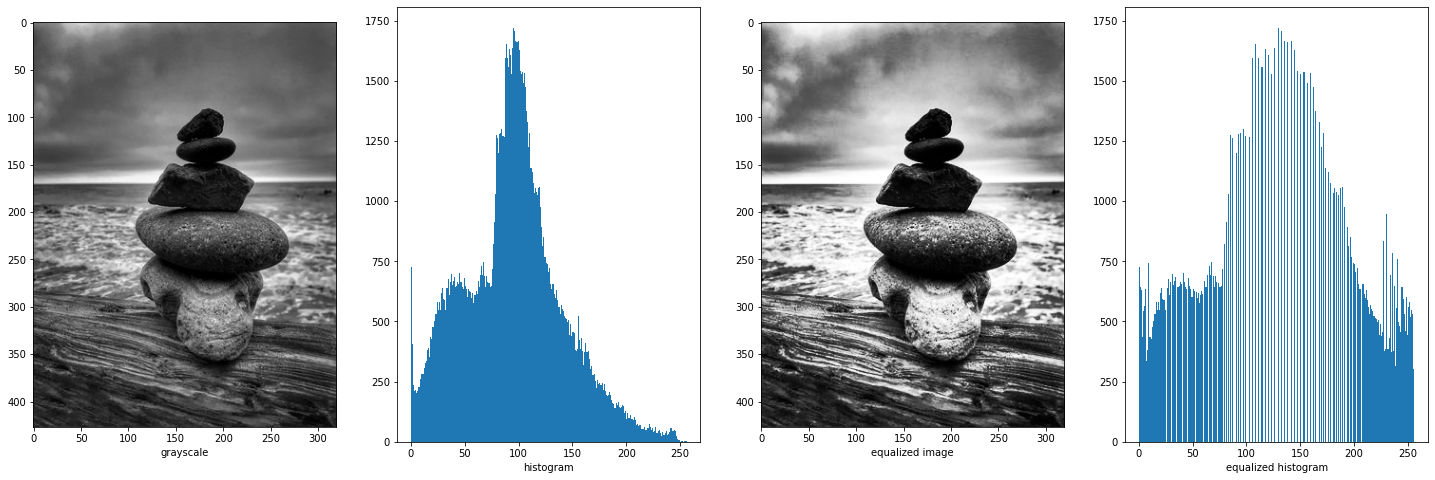

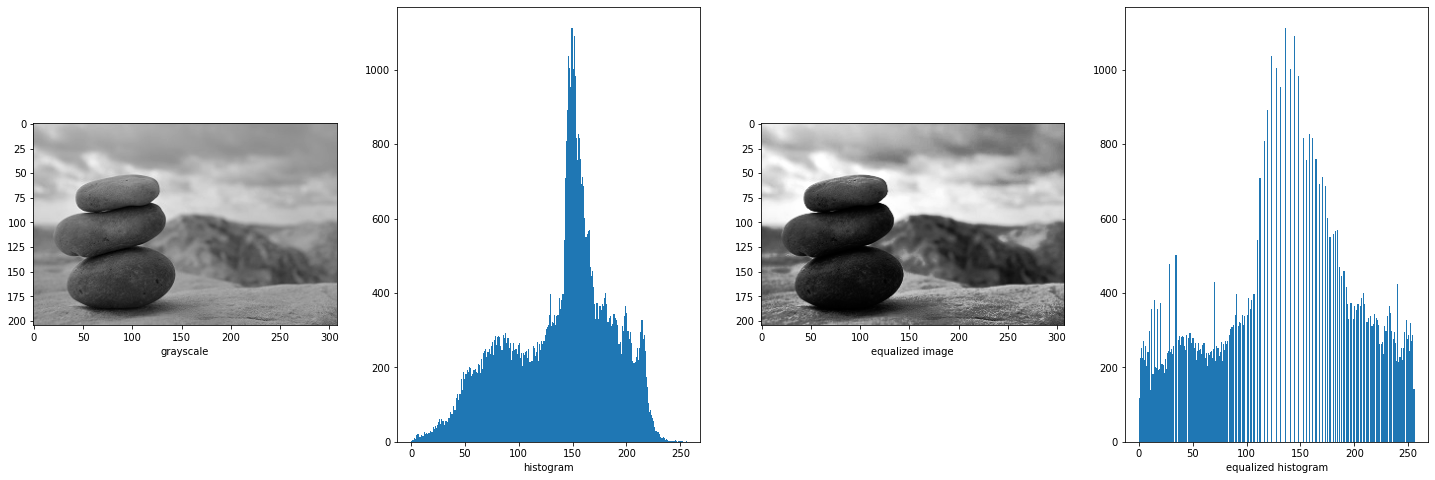

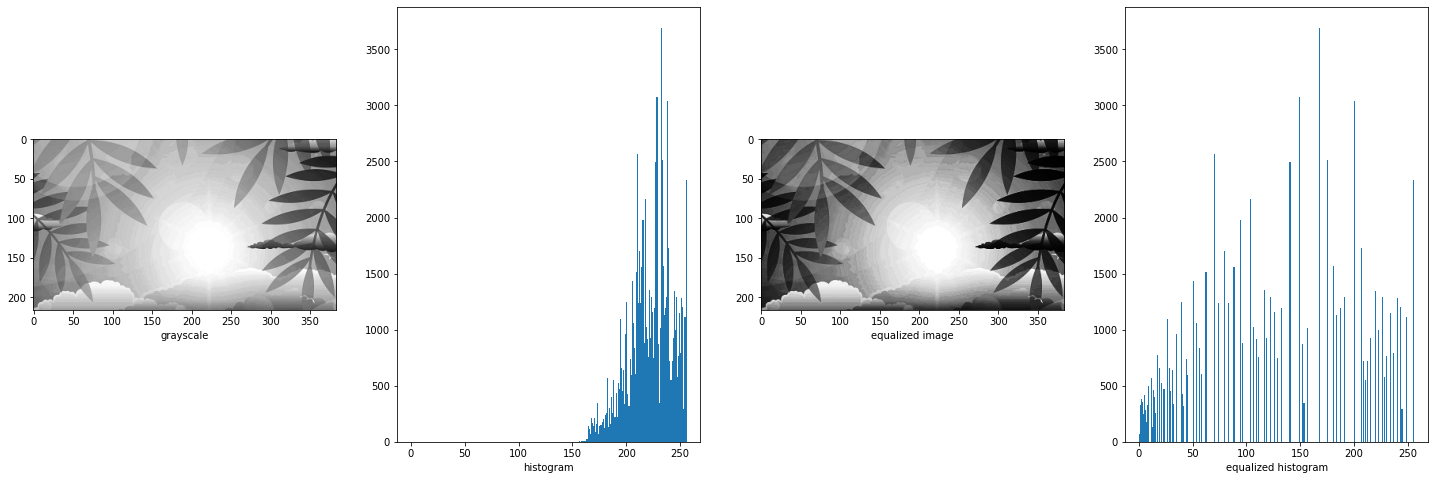

In [7]:
for img_path in IMAGES_PATHS[:3]:
    f, axarr = plt.subplots(1,4, figsize=(25,8))

    img = cv2.imread(img_path,0)
    equ_img = cv2.equalizeHist(img) 
    
    axarr[0].imshow(img, cmap="gray")
    axarr[0].set_xlabel("grayscale")
    axarr[1].hist(img.ravel(),256,[0,256])
    axarr[1].set_xlabel("histogram")
    axarr[2].imshow(equ_img, cmap="gray")
    axarr[2].set_xlabel("equalized image")
    axarr[3].hist(equ_img.ravel(),256,[0,256])
    axarr[3].set_xlabel("equalized histogram")
    
    plt.show()

## 2.4
You are required to implement the convolution operation from scratch. This function which takes an
image and a kernel and returns the convolution of them.
Compare the results of your implemented function with the ones available (built-in) in python
packages. You are required to convolve images for sharpening and blurring effects. (5 points)

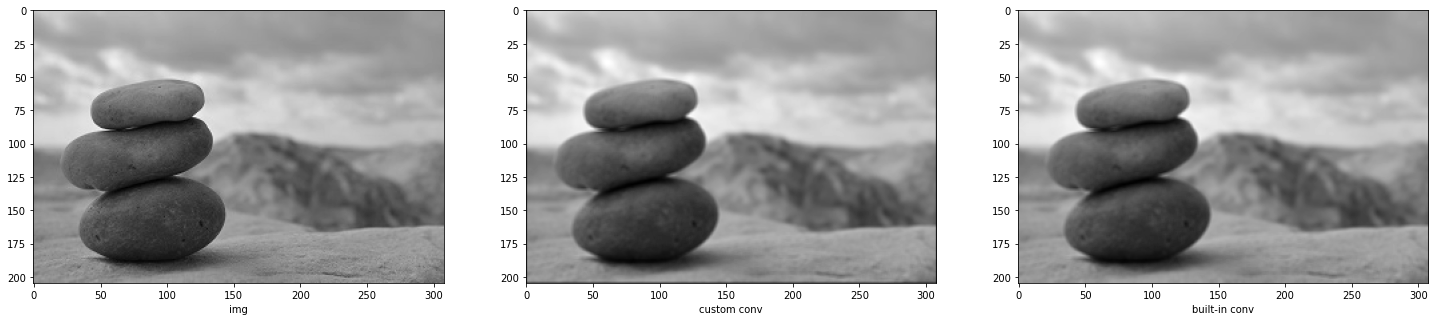

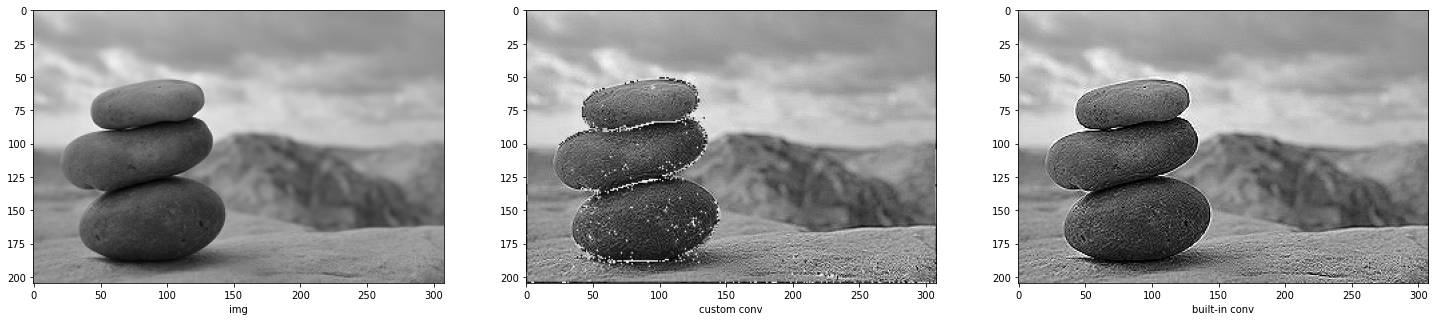

In [8]:
img = cv2.imread(IMAGES_PATHS[1],0)

# blurring filter
kernel = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9.0
out_img = utils.convolution(img, kernel)
cv_filter_img = cv2.filter2D(img, -1, kernel)

f, axarr = plt.subplots(1,3, figsize=(25,8))
axarr[0].imshow(img, cmap="gray")
axarr[0].set_xlabel("img")
axarr[1].imshow(out_img, cmap="gray")
axarr[1].set_xlabel("custom conv")
axarr[2].imshow(cv_filter_img, cmap="gray")
axarr[2].set_xlabel("built-in conv")

plt.show()

# sharpening filter
kernel = np.array(([0, -1, 0],[-1, 5, -1],[0, -1, 0]))
out_img = utils.convolution(img, kernel)
cv_filter_img = cv2.filter2D(img, -1, kernel)

f, axarr = plt.subplots(1,3, figsize=(25,8))
axarr[0].imshow(img, cmap="gray")
axarr[0].set_xlabel("img")
axarr[1].imshow(out_img, cmap="gray")
axarr[1].set_xlabel("custom conv")
axarr[2].imshow(cv_filter_img, cmap="gray")
axarr[2].set_xlabel("built-in conv")

plt.show()

## 2.5
Load a couple of images from the given set.
1. Apply box filter using convolution, and display the resultant image
2. Apply Gaussian filter to the image, with varying sigma values.
3. Add Gausian Noise and Salt and Pepper Noise to them.
4. Apply Gaussian Filter and Median Filters.
5: Display mesh plots for different i) Gaussian filters, ii) First Order Derivative of Gaussian, iii)
Laplacian of Gaussian; using different sigma values
3You are encouraged to play with the different parameter values.The results should be displayed in
three columns i.e Original Image, Corrupted Image and the Filtered Image.
(20 points)

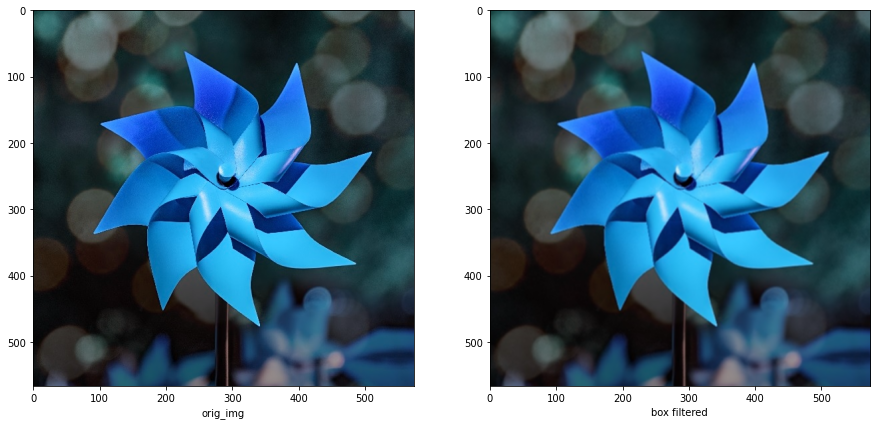

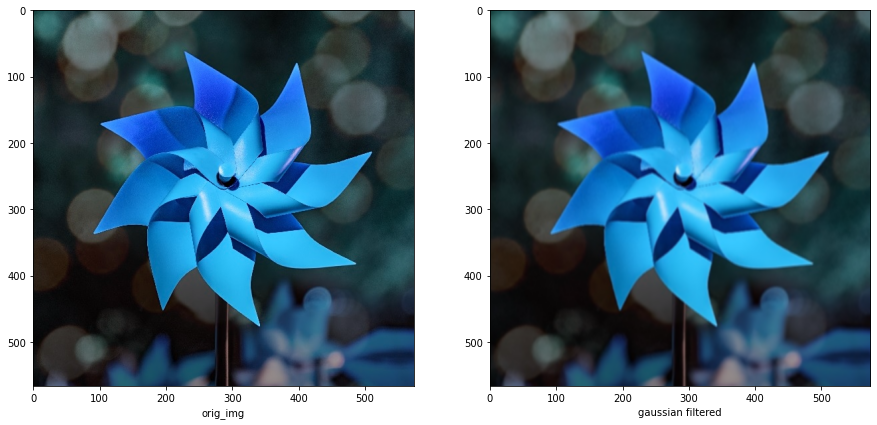

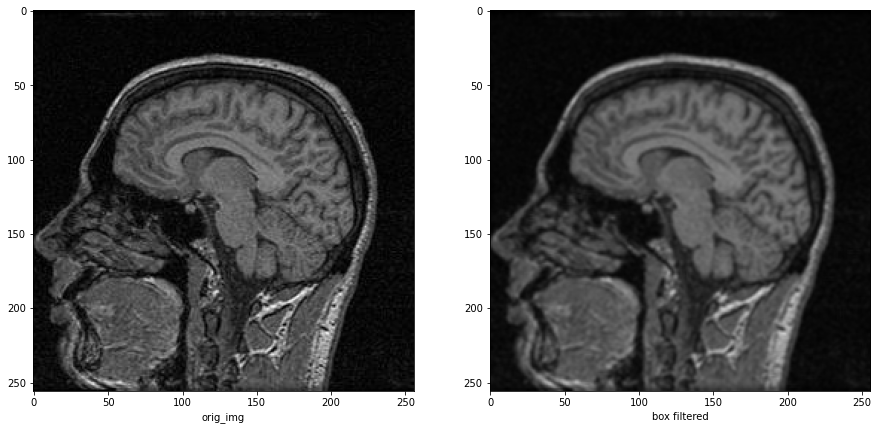

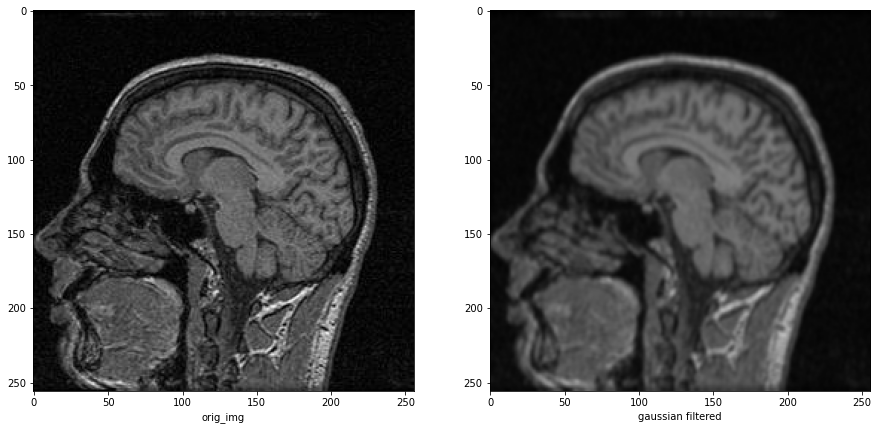

In [9]:
for img_path in IMAGES_PATHS[-2:]:
    img = cv2.imread(img_path)
    # 2.5.1
    box_filter = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9.0
    out = cv2.filter2D(img, -1, box_filter)
    
    f, axarr = plt.subplots(1,2, figsize=(15,8))
    axarr[0].imshow(img)
    axarr[0].set_xlabel("orig_img")
    axarr[1].imshow(out)
    axarr[1].set_xlabel("box filtered")
    
    # 2.5.2
    out = cv2.GaussianBlur(img,(5,5),0, 2, 2)
    
    f, axarr = plt.subplots(1,2, figsize=(15,8))
    axarr[0].imshow(img)
    axarr[0].set_xlabel("orig_img")
    axarr[1].imshow(out)
    axarr[1].set_xlabel("gaussian filtered")

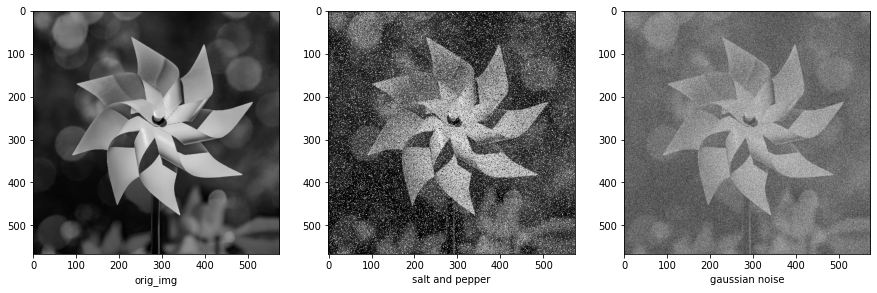

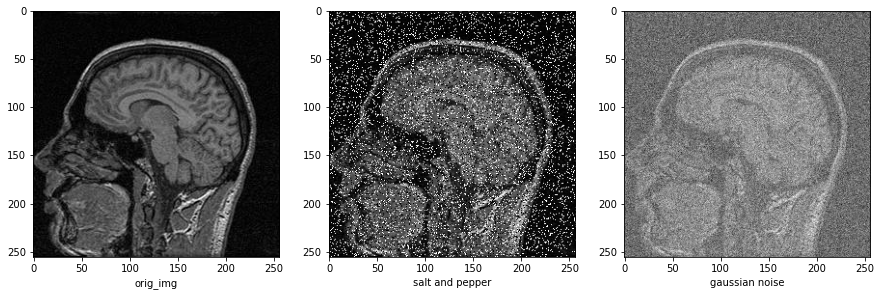

In [10]:
# 2.5.3
for img_path in IMAGES_PATHS[-2:]:
    img = cv2.imread(img_path,0)
    
    salt_pepper_img = utils.salt_and_pepper(img, 0.1)
    gaussian_noised_img = utils.gaussian_noise(img)
    
    f, axarr = plt.subplots(1,3, figsize=(15,8))
    axarr[0].imshow(img, cmap="gray")
    axarr[0].set_xlabel("orig_img")
    axarr[1].imshow(salt_pepper_img, cmap="gray")
    axarr[1].set_xlabel("salt and pepper")
    axarr[2].imshow(gaussian_noised_img, cmap="gray")
    axarr[2].set_xlabel("gaussian noise")

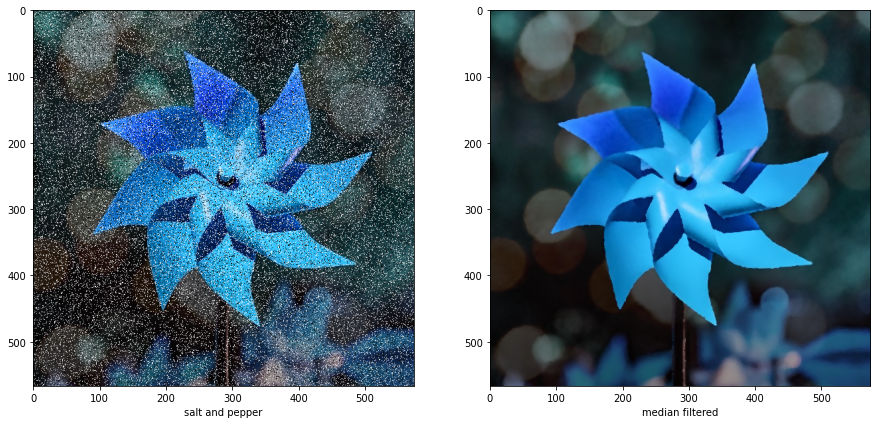

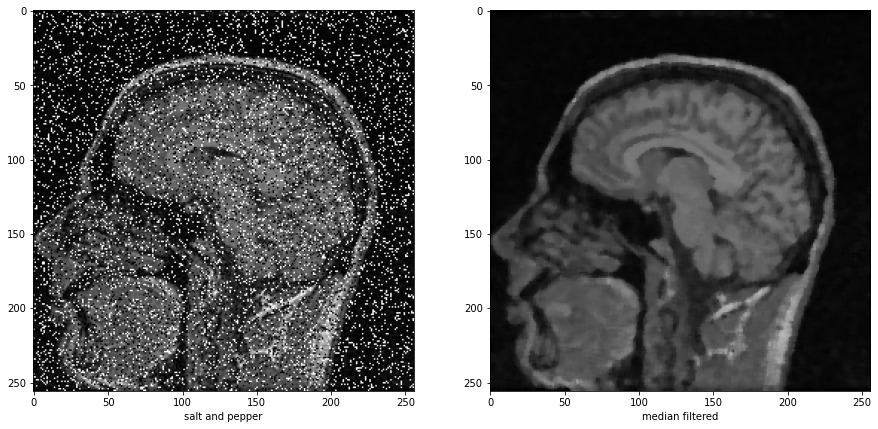

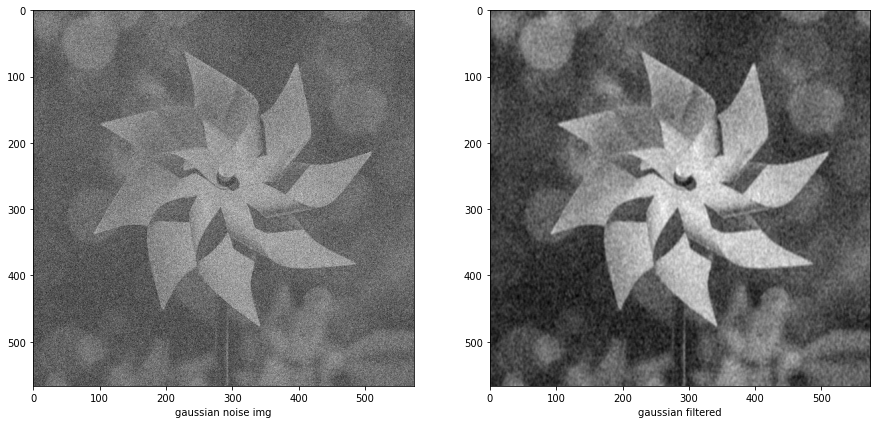

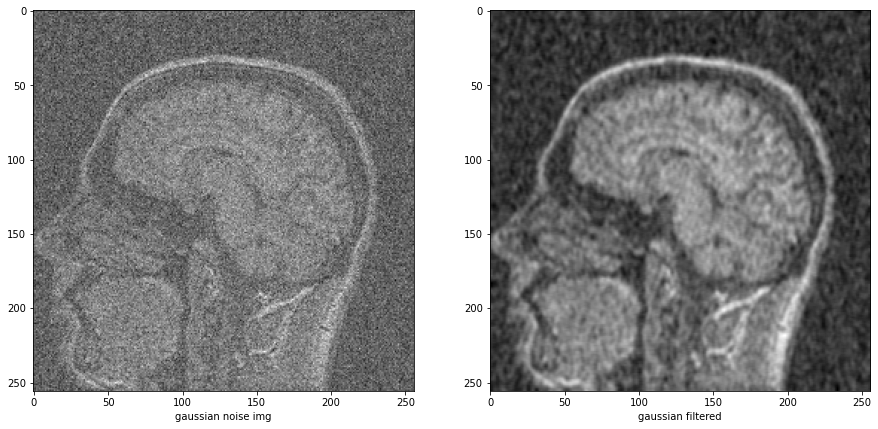

In [11]:
# 2.5.4
for img_path in IMAGES_PATHS[-2:]:
    img = cv2.imread(img_path)
    
    salt_pepper_img = utils.salt_and_pepper(img, 0.1)    
    median = cv2.medianBlur(salt_pepper_img,5)
    
    f, axarr = plt.subplots(1,2, figsize=(15,8))
    axarr[0].imshow(salt_pepper_img)
    axarr[0].set_xlabel("salt and pepper")
    axarr[1].imshow(median)
    axarr[1].set_xlabel("median filtered")
    
for img_path in IMAGES_PATHS[-2:]:
    img = cv2.imread(img_path,0)
    
    gaussian_img = utils.gaussian_noise(img)
    out = cv2.GaussianBlur(gaussian_img,(5,5),0, 2, 2)
    
    f, axarr = plt.subplots(1,2, figsize=(15,8))
    axarr[0].imshow(gaussian_img, cmap="gray")
    axarr[0].set_xlabel("gaussian noise img")
    axarr[1].imshow(out, cmap="gray")
    axarr[1].set_xlabel("gaussian filtered")
plt.show()

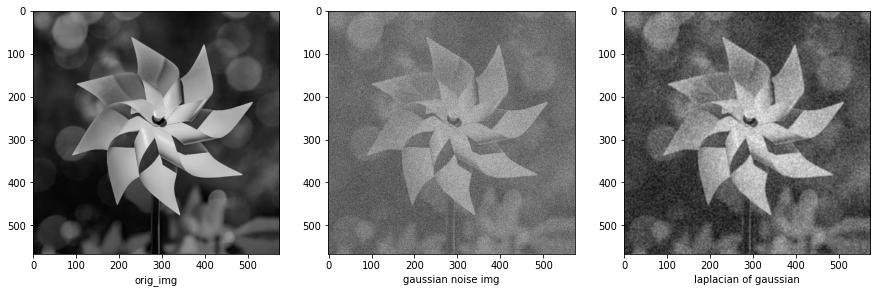

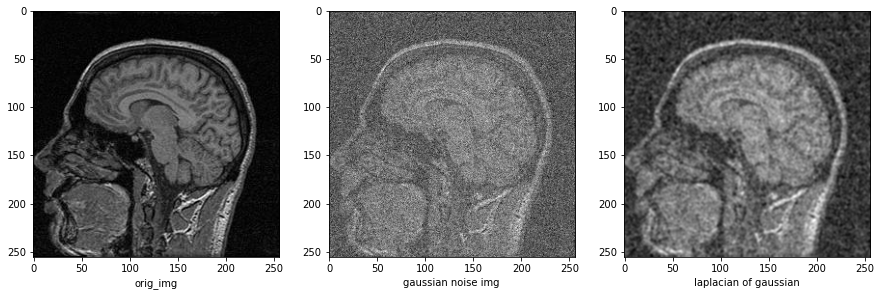

In [12]:
#2.5.5
for img_path in IMAGES_PATHS[-2:]:
    img = cv2.imread(img_path,0)
    
    gaussian_img = utils.gaussian_noise(img)
    out = cv2.GaussianBlur(gaussian_img,(5,5),0)
 
    laplacian = cv2.Laplacian(out,cv2.CV_64F)

    f, axarr = plt.subplots(1,3, figsize=(15,8))
    axarr[0].imshow(img, cmap="gray")
    axarr[0].set_xlabel("orig_img")
    axarr[1].imshow(gaussian_img, cmap="gray")
    axarr[1].set_xlabel("gaussian noise img")
    axarr[2].imshow(out, cmap="gray")
    axarr[2].set_xlabel("laplacian of gaussian")
plt.show()

## 2.6
Load a few images from the given set.
1. Apply Sobel operator, computer gradient magnitude and display the results (original image, gradi-
ent images and gradient magnitude image).
2. Apply Laplacian of Gaussian, computer laplacian magnitude and display the results (original im-
age, filtered images and laplacian magnitude image). Try different filter kernel coefficients.
3. Apply Canny Edge Detector and display the results.
You are encouraged to play with the different parameter values (20 points)

kernel 3x3


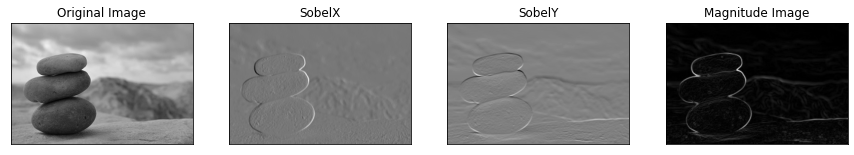

kernel 9x9


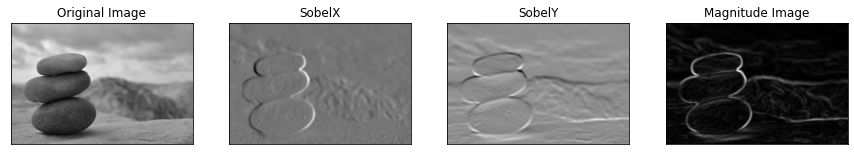

In [13]:
# 2.6.1

img = cv2.imread(IMAGES_PATHS[1],0)
print("kernel 3x3")
# x and y gradients
gradX = cv2.Sobel(img, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = 3)
gradY = cv2.Sobel(img, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = 3)
# calc gradient magnitude
grad = np.sqrt(gradX**2 + gradY**2)
grad_norm = (grad * 255 / grad.max()).astype(np.uint8)
# display results
plt.figure(figsize=(15,8))
plt.subplot(141),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(gradX,cmap = 'gray')
plt.title('SobelX'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(gradY, cmap = 'gray')
plt.title('SobelY'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(grad_norm,cmap = 'gray')
plt.title('Magnitude Image'), plt.xticks([]), plt.yticks([])
plt.show()

print("kernel 9x9")
# x and y gradients
gradX = cv2.Sobel(img, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = 9)
gradY = cv2.Sobel(img, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = 9)
# calc gradient magnitude
grad = np.sqrt(gradX**2 + gradY**2)
grad_norm = (grad * 255 / grad.max()).astype(np.uint8)
# display results
plt.figure(figsize=(15,8))
plt.subplot(141),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(gradX,cmap = 'gray')
plt.title('SobelX'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(gradY, cmap = 'gray')
plt.title('SobelY'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(grad_norm,cmap = 'gray')
plt.title('Magnitude Image'), plt.xticks([]), plt.yticks([])
plt.show()

## 2.6
Load a few images from the given set.
1. Apply Sobel operator, computer gradient magnitude and display the results (original image, gradient images and gradient magnitude image).
2. Apply Laplacian of Gaussian, computer laplacian magnitude and display the results (original image, filtered images and laplacian magnitude image). Try different filter kernel coefficients.
3. Apply Canny Edge Detector and display the results.
You are encouraged to play with the different parameter values (20 points)


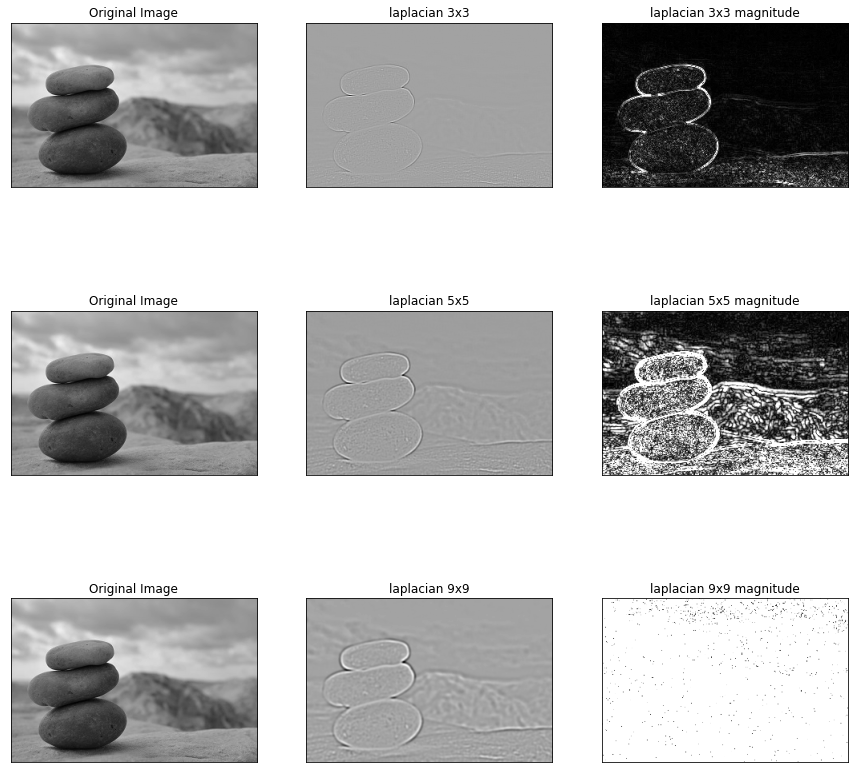

In [14]:
img = cv2.imread(IMAGES_PATHS[1],0)

k3laplacian = cv2.Laplacian(img, ddepth=cv2.CV_64F, ksize=3)
k3abs = cv2.convertScaleAbs(k3laplacian)

k5laplacian = cv2.Laplacian(img, ddepth=cv2.CV_64F, ksize=5)
k5abs = cv2.convertScaleAbs(k5laplacian)

k9laplacian = cv2.Laplacian(img, ddepth=cv2.CV_64F, ksize=9)
k9abs = cv2.convertScaleAbs(k9laplacian)

# display results
plt.figure(figsize=(15,15))
plt.subplot(331),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(332),plt.imshow(k3laplacian,cmap = 'gray')
plt.title('laplacian 3x3'), plt.xticks([]), plt.yticks([])
plt.subplot(333),plt.imshow(k3abs,cmap = 'gray')
plt.title('laplacian 3x3 magnitude'), plt.xticks([]), plt.yticks([])

plt.subplot(334),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(335),plt.imshow(k5laplacian,cmap = 'gray')
plt.title('laplacian 5x5'), plt.xticks([]), plt.yticks([])
plt.subplot(336),plt.imshow(k5abs,cmap = 'gray')
plt.title('laplacian 5x5 magnitude'), plt.xticks([]), plt.yticks([])

plt.subplot(337),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(338),plt.imshow(k9laplacian,cmap = 'gray')
plt.title('laplacian 9x9'), plt.xticks([]), plt.yticks([])
plt.subplot(339),plt.imshow(k9abs,cmap = 'gray')
plt.title('laplacian 9x9 magnitude'), plt.xticks([]), plt.yticks([])

plt.show()

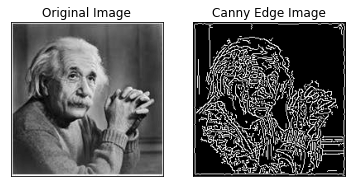

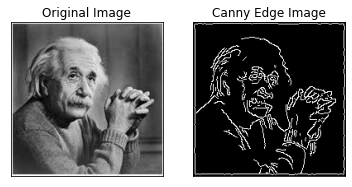

In [15]:
# 2.6.3
img = cv2.imread(IMAGES_PATHS[3],0)

edges = cv2.Canny(img,50,100)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Canny Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

edges = cv2.Canny(img,200,300)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Canny Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

## 2.7 Bonus Marks
(5 points) Implement Canny Edge detector from scratch or use built-in function from python packages,
and apply it on a real time video/stream.

In [17]:
cap = cv2.VideoCapture(0)

while True:
    try:
        # read frame
        ret, frame = cap.read()
        # applying gaussian blur before edge detection, 
        # softening the image always gives better edges
        frame = cv2.GaussianBlur(frame, (7, 7), 1)
        # convert bgr to grayscale image
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # apply canny edge detection
        edge = cv2.Canny(frame, 50, 100)
        
        IPython.display.clear_output(wait=True)

        plt.imshow(edge, cmap="gray")
        plt.title("Real-time canny edge detection")
        plt.axis("off")
        plt.show()
    # handle jupyter notebook interrupt to stop webcam
    # webcam will remain open if we don't handle this.
    except KeyboardInterrupt:
        cap.release()
        print("webcam stopped.")

webcam stopped.


error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-95hbg2jt\opencv\modules\imgproc\src\smooth.dispatch.cpp:620: error: (-215:Assertion failed) !_src.empty() in function 'cv::GaussianBlur'
